# Multi-Class Text Classification with Turkish Dataset

<h3>In this kernel, I will try to classify "comments"(text) with "categories"(text) using CNN</h3>
<p style="font-size:20px">Table of Content</p>

* [Data Overview](#1)
* [Word Overview](#2)
* [NLP Processing](#3)
* [ANN Building and Fitting](#4)
* [CNN Building and Fitting](#5)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Added shopping_cart.png for wordcloud")

/kaggle/input/multiclass-classification-data-for-turkish-tc32/ticaret-yorum.csv
/kaggle/input/shopping-cart/shopping_cart.png
Added shopping_cart.png for wordcloud


Using TensorFlow backend.


# **Data Overview** <a id="1"></a>

In [2]:
data = pd.read_csv('/kaggle/input/multiclass-classification-data-for-turkish-tc32/ticaret-yorum.csv')
pd.set_option('max_colwidth', 500)
data.head(5)

,category,text
0,alisveris,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
1,alisveris,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku"
2,alisveris,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim. Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti. Ürünü teslim aldıktan son...Devamını oku"
3,alisveris,"Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Dizlik Esnemiyor!,Anda ihtiyaç ve tüketim maddeleri pazarlama san. Lim. Şti. Den 139 TL kapıda teslim knee tork adlı ürünü satın aldım. Ürün 0815774588452 takip no... İle Aras Kargo tarafından tarafıma teslim edildi. Ürün kargoya firma tarafından 26.05.2020 tarihinde kargoya verilmiş. Ürünün üst dizlik bedeni bacağım...Devamını oku"
4,alisveris,"BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı Ve Muhatap Bulamıyorum!,Fotoğrafını göndermiş olduğum ürünün kablosunda temassızlık var ve ne fatura ne numara sadece gönderen kargonun adı var ve onlara da ulaşamıyorum ayrıca kargo daha bugün elime geçti Denizli Marmaris gezmiş ürün. Beni arayan numarayı buldum ona da ulaşılamıyor.Devamını oku"


In [3]:
data.describe()

,category,text
count,431306,431306
unique,32,427231
top,kamu-hizmetleri,"Cinemaximum Kullanıcı Bulunamadı Hatası,""Daha önce yaşadığım sorunu tekrar yaşıyorum. Bilgilerim ile giriş yapamıyorum, kullanıcı bulunamadı hatası alıyorum. Yeniden üye olmaya çalışınca bu bilgilere ait kullanıcı var diyor. Artık bu sorunuma bir çözüm bulunmasını istiyorum. Bu sorunu tekrar yasamaktan bıktım resmen. Kalıcı bir çözüm istiy...Devamını oku"""
freq,14009,154


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431306 entries, 0 to 431305
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  431306 non-null  object
 1   text      431306 non-null  object
dtypes: object(2)
memory usage: 6.6+ MB


Let me explain categories:
* Kamu Hizmetleri: Public Service
* Finans: Finance
* Cep Telefon Kategori: Mobile Phone Category
* Enerji: Energy
* Ulaşım: Transportation
* Kargo-Nakliyat: Cargo-Shipping
* Medya: Media
* Mutfak Araç-Gereç: Kitchen Tools
* Alışveriş: Shopping
* Mekan ve Eğlence: Venue and Entertainment
* Elektronik: Electronic
* Beyaz Eşya: Home Appliance
* Küçük Ev Aletleri: Small Appliances
* İnternet: Internet
* Giyim: Clothing
* Etkinlik ve Organizasyon: Event and Organization
* İçecek: Beverage
* Sağlık: Medical
* Sigortacılık: Insurance
* Spor: Sport
* Mobilya-Ev Tekstili: Furniture-Home Textile
* Otomotiv: Automotive
* Turizm: Tourism
* Eğitim: Education
* Gıda: Food
* Temizlik: Cleaning
* Hizmet Sektörü: Service Industry
* Mücevher-Saat-Gözlük: Jewel-Watch-Glasses
* Bilgisayar: Computer
* Kişisel Bakım ve Kozmetik: Personal Care and Cosmetics
* Anne-Bebek: Mother-Baby
* Emlak ve İnşaat: Real Estate and Construction

In [5]:
data.category.value_counts()

kamu-hizmetleri              14009
finans                       13982
cep-telefon-kategori         13981
enerji                       13979
ulasim                       13957
kargo-nakliyat               13918
medya                        13910
mutfak-arac-gerec            13870
alisveris                    13835
mekan-ve-eglence             13810
elektronik                   13772
beyaz-esya                   13763
kucuk-ev-aletleri            13733
internet                     13694
giyim                        13690
etkinlik-ve-organizasyon     13655
icecek                       13564
saglik                       13560
sigortacilik                 13488
spor                         13449
mobilya-ev-tekstili          13434
otomotiv                     13379
turizm                       13318
egitim                       13269
gida                         13150
temizlik                     13113
hizmet-sektoru               13031
mucevher-saat-gozluk         12964
bilgisayar          

<h2>So data contains 431306 lines and 32 unique categories and it seems there is no NaN, right?</h2>
<h3>But why text label has 4075 (431306-427231) non-unique comments? And we have a "top" comment starts with "Cinemaximum 4 Aydır" so let's check what it is  </h3>

In [6]:
count = 0
cinemaximum4aydir = "Cinemaximum 4 Aydır Bilet Paralarını Bir Türlü İade Etmiyor,"
for text in data.text:
    if cinemaximum4aydir in text[:len(cinemaximum4aydir)]:
        count += 1
print(count)

154


So they really are duplicated...

We don't need to but I want to get rid of every non-unique comment so I will use pandas' 2 functions named "duplicated" and "drop_duplicates"

"duplicated" gets keep={‘first’, ‘last’, False} parameter and can be used both "pandas.DataFrame" and "pandas.Series" objects and returns "pandas.Series" object with True-False statements 

"drop_duplicates" works like "dropna" so it gets inplace={True,False} and subset={column label} with keep={‘first’,‘last’ False}
There is also another parameter named ignore_index={True,False} let me explain this
In default ignore_index=False it means if it remove a duplicated, index will not change so 1-a,2-a,3-b will be 1-a,3-b and it breaks for loop with len(data) because of that we need to change ignore_index


In default keep ="first"


In [7]:
exampleArray = np.array([[1,1],[1,2],[4,5]])
exampleFrame = pd.DataFrame(exampleArray,columns=["ex1","ex2"])
exampleFrame

,ex1,ex2
0,1,1
1,1,2
2,4,5


In [8]:
ex1 = exampleFrame.drop_duplicates(subset="ex1",keep="first")
print("Without ignore_index")
print(ex1)
ex2 = exampleFrame.drop_duplicates(subset="ex1",keep="first",ignore_index=True)
print("With ignore_index")
print(ex2)

Without ignore_index
   ex1  ex2
0    1    1
2    4    5
With ignore_index
   ex1  ex2
0    1    1
1    4    5


In [9]:
data.text.duplicated(keep="first").value_counts()

False    427231
True       4075
Name: text, dtype: int64

In [10]:
data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
data.describe()

,category,text
count,427231,427231
unique,32,427231
top,kamu-hizmetleri,"VakıfBank Talebimin Karşılanmaması Sorunu,Bir hafta kadar önce VakıfBank World kredi kartı limitimin düşürülmesi için telefon bankacılığından başvurmama ve talebim işleme alınmasına rağmen halen kredi kartı limit düşürme işlemim tamamlanmadı. Kredi kartı limit düşürme işlemim tamamlanmasını talep ediyorum. Devamını oku"
freq,13998,1


<h2> Now we can visualize Category</h2>

In [11]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.io as pio

init_notebook_mode(True)

fig = px.bar(x=data.category.value_counts().index,y=data.category.value_counts(),color=data.category.value_counts().index,text=data.category.value_counts())
fig.update_traces(hovertemplate="Category:'%{x}' Counted: %{y}")
fig.update_layout(title={"text":"Category Counts","x":0.5,"font":{"size":35}},xaxis={"title":"Category","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white",width=800,height=500,showlegend=False)
iplot(fig)

In [12]:
fig1 = px.pie(data,values=data.category.value_counts(),names=data.category.value_counts().index)
fig1.update_traces(textposition='auto', textinfo='percent+label',marker={"line":{"width":1}},hoverinfo='label+percent',hole=0.4)
fig1.update_layout(annotations=[{"text":"Percentages","showarrow":False,"font_size":17}])
iplot(fig1)

# **Word Overview** <a id="2"></a>
<h3> Let's start with word list</h3>

In [13]:
import re

wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)

In [14]:
from collections import Counter

wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)

print("Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

Most Used 20 Words
oku : 382925
bir : 290203
ve : 254437
için : 134568
bu : 123079
de : 111211
da : 88801
ama : 70306
yok : 67821
ile : 67620
gün : 67342
aldım : 65740
sonra : 64183
ne : 62723
rağmen : 61891
TL : 59720
önce : 58567
tarihinde : 57490
çok : 56586
kadar : 55290


<h2>So they are most used 20 words... </h2>
<h3>But why is "oku" -"read" in english- used 386776 times even if there are 427231	texts? Let's see...</h3>

In [15]:
for i in data["text"][7:10]:
    if "oku" in i:
        print(i)
        print("*"*20)

Pekdemir Çiftliği AVM Avm Ye Alınmadık,20 55te AVM ye alınmadık Alaşehir camialtı şubesi. Mağdur edildik. Yani son kapanış saati 21 00. Fakat mağazayı 55 geçe kapatıyorlar. Gerçekten böyle bir şey olamaz. Bir de tavırları çok kötü çalışanların. Lütfen bu konuya bir çare bulun. Müşteri hizmetlerini aradık fakat telefona kimse çıkmadı bizd...Devamını oku
********************
Teknosa Kargom Hareket Etmedi,"2251****96 numaralı siparişimdeki Aras Kargo 8218****4300 gönderi numaralı, gönderim 08/06/2020 tarihinde Orhanlı kurumsal şubesinden Teknosa tarafından kargoya verildi, ancak 2 gündür hiç hareket etmedi ayrıca da şubenin ve Aras Kargo genel müdürlüğünün telefonlarına ulaşamıyorum. Bu konunun çözülm...Devamını oku"
********************
Confident AVM Eksik Ürün Gönderimi,"03.05.2020 tarihinde confident Çerkezköy şubesinden aldığım altis break koşu bandının kullanım kılavuzu, emniyet anahtarı, garanti belgesi ve kurulumda kullanılan gerekli aparatlar ürünle beraber gönderilmedi. Mağazayı 

<h2>As we can see 'oku' and 'oku"' used with "Devamını" -"more" in english-</h2>
<h3>We know this dataset contains "comments" so "... Devamını oku" is used to see rest of the comment. It means we can clear it too for better visualization!</h3>

In [16]:
def dontReadMore(text):
    temptext = text.split(".")
    if "Devamını" in temptext[-1]:
        text = temptext[:-1]
    return "".join(text)

data["text"] = data["text"].apply(dontReadMore)

In [17]:
for i in data["text"][200:500]:
    if "oku" in i:
        print(i)
        print("*"*20)

Migros Sanal Market Ürünü Günlerdir Teslim Edemedi,"E-Ticaret Türkiye'ye geldi geleli ben internet üzerinden alışveriş yapıyorum.  Adına güvendik kurumsal dedik sipariş verdik. Bir yazıcı siparişi verdim dokuz gün önce hala ne bir haber ne bir bir şey sipariş hazırlanıyor bilgisi. Sadece bu. Giriyorum çıkıyorum sipariş hazırlanıyor.
********************
Tatbak Gıda Kıl  Çıkması Sorunu,Yıllardır severek aldığım ürünlerinizden maalesef ki 2 kez saç kılı ile karşılaşmak bizi şok etti Bir önceki dönemde de mozaik pastada aynı şoku yaşadık maalesef üzülerek size yazma gereği duydum Kalın bizler bu ürünler karşında inanın şok yaşadık sizden ricam bizlerin severek alışveriş yaptığımız
********************
Teknosa Kendi Açtığı Ürünü Geri Almıyor, 03062020 tarihinde İzmir Forum Bornova'daki Teknosa şubesinden cep telefonu aldım Ürünü ödedikten sonra müşteri temsilcisi standart prosedürle kurulum yapacaklarını söyledi Paketi açtı kurulumu sağladı Eve geldiğimde yorumları okuyarak ürünü iade etme

<h3>Now we can visualize with REAL most used words </h3>

In [18]:
wordList = list()
for i in range(len(data)):
    temp = data.text[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordList.append(k)
wordCount = Counter(wordList)
countedWordDict = dict(wordCount)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
print("REAL Most Used 20 Words")
for word,counted in sortedWordDict[0:20]:
    print("{} : {}".format(word,counted))

REAL Most Used 20 Words
bir : 285211
ve : 252911
için : 133758
bu : 120038
de : 110912
da : 87940
yok : 69197
ama : 69057
ile : 67350
gün : 66870
aldım : 65407
sonra : 63832
rağmen : 61535
ne : 60840
TL : 59210
önce : 58022
tarihinde : 57368
çok : 55717
kadar : 54050
daha : 52996


In [19]:
num = 75 # For using most used 75 words
list1 = list()
list2 = list()
for i in range(num):
    list1.append(wordCount.most_common(num)[i][0])
    list2.append(wordCount.most_common(num)[i][1])

In [20]:
fig2 = px.bar(x=list1,y=list2,color=list2,hover_name=list1,hover_data={'Word':list1,"Count":list2})
fig2.update_traces(hovertemplate="Word:'%{x}' Value: %{y}")
fig2.update_layout(title={"text":"Word Values","x":0.5,"font":{"size":30}},xaxis={"title":"Words","showgrid":False},yaxis={"title":"Value","showgrid":False},plot_bgcolor="white")
fig2.show()

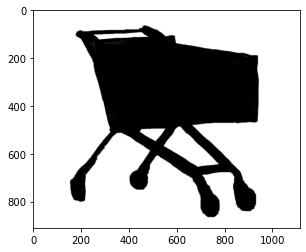

In [21]:
from PIL import Image

shopping_cart = np.array(Image.open("/kaggle/input/shopping-cart/shopping_cart.png"))
plt.imshow(shopping_cart)

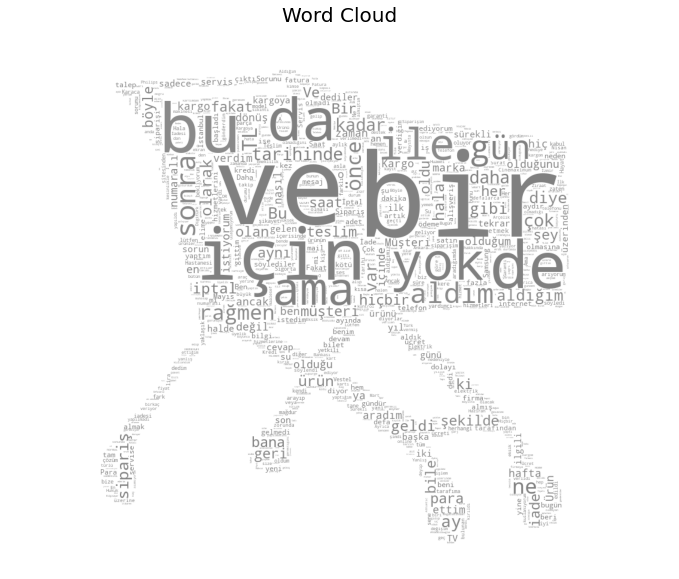

In [22]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,0%%, %d%%)" % np.random.randint(50,55))

stopwordCloud = set(stopwords.words("turkish"))

wordcloud = WordCloud(stopwords=stopwordCloud,max_words=1000,background_color="white",min_font_size=3,mask=shopping_cart).generate_from_frequencies(countedWordDict)
wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=[13,10])
plt.axis("off")
plt.title("Word Cloud",fontsize=20)
plt.imshow(wordcloud)
plt.show()

# **NLP Processing** <a id="3"></a>

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
import time

ps = PorterStemmer()
stopwordSet = set(stopwords.words('turkish'))

t = time.time()

def leadMyWord(text):
    text = re.sub('[^a-zA-ZğĞüÜşŞıİöÖçÇ]'," ",text)
    text = text.lower()
    text = word_tokenize(text,language='turkish')
    text = [word for word in text if not word in stopwordSet]
    text = " ".join(text)
    return text   

textList = data.text.apply(leadMyWord)
textList = list(textList)

print("Before")
print(data["text"][2])
print("After")
print(textList[2])
print("Time Passed")
print(time.time()-t)

Before
Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti Ürünü teslim aldıktan son
After
okyanus petshop ürün i̇ade sorunu satıcıdan gittigidiyor üzerinden tl tutarında frolicat interactive kedi lazer oyuncağı satın aldım ürünü açıp bir çalıştırdığımda gürültü çıkardığını fark ettim ürünü iade etmeye karar verdim hatam iade sürecinin gün içinde olması gerektiğini bilmemekti ürünü teslim aldıktan son
Time Passed
286.1147549152374


In [24]:
#preparing y

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le = LabelEncoder()
labelEncode = le.fit_transform(data["category"])
print("LabelEncode")
print(labelEncode)
categorical_y = to_categorical(labelEncode)
print("To_Categorical")
print(categorical_y)

LabelEncode
[ 0  0  0 ... 31 31 31]
To_Categorical
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


# **ANN Building and Fitting** <a id="4"></a>

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#preparing x for ANN
tfidv = TfidfVectorizer(max_features=20001)
x = tfidv.fit_transform(textList)
x.sort_indices()

x_train,x_test,y_train,y_test = train_test_split(x,categorical_y,test_size=0.33,random_state=42)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.losses import categorical_crossentropy

def build_ann_model():
    model = Sequential()
    
    model.add(Dense(units=1024,activation="relu",input_dim=x_train.shape[1]))
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dense(units=y_train.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000015,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

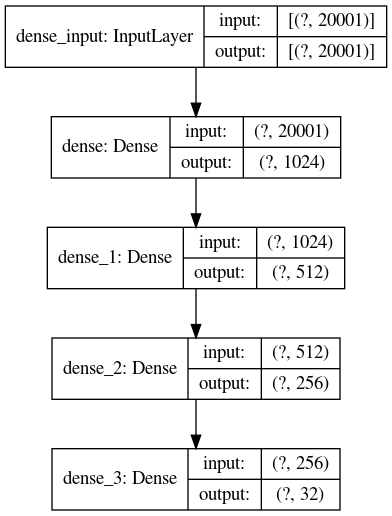

In [27]:
ann_model = build_ann_model()
plot_model(ann_model,show_shapes=True)

In [28]:
ann_history = ann_model.fit(x_train,y_train,epochs=10,batch_size=256,shuffle=True)
ypred = ann_model.predict(x_test)

Epoch 1/10
1119/1119 [==============================] - 115s 102ms/step - loss: 2.9156 - accuracy: 0.4742
Epoch 2/10
1119/1119 [==============================] - 109s 98ms/step - loss: 1.0460 - accuracy: 0.8247
Epoch 3/10
1119/1119 [==============================] - 110s 99ms/step - loss: 0.5514 - accuracy: 0.8848
Epoch 4/10
1119/1119 [==============================] - 110s 99ms/step - loss: 0.3989 - accuracy: 0.9093
Epoch 5/10
1119/1119 [==============================] - 110s 98ms/step - loss: 0.3236 - accuracy: 0.9235
Epoch 6/10
1119/1119 [==============================] - 112s 100ms/step - loss: 0.2768 - accuracy: 0.9331
Epoch 7/10
1119/1119 [==============================] - 116s 103ms/step - loss: 0.2437 - accuracy: 0.9405
Epoch 8/10
1119/1119 [==============================] - 109s 98ms/step - loss: 0.2180 - accuracy: 0.9464
Epoch 9/10
1119/1119 [==============================] - 109s 98ms/step - loss: 0.1972 - accuracy: 0.9516
Epoch 10/10
1119/1119 [=============================

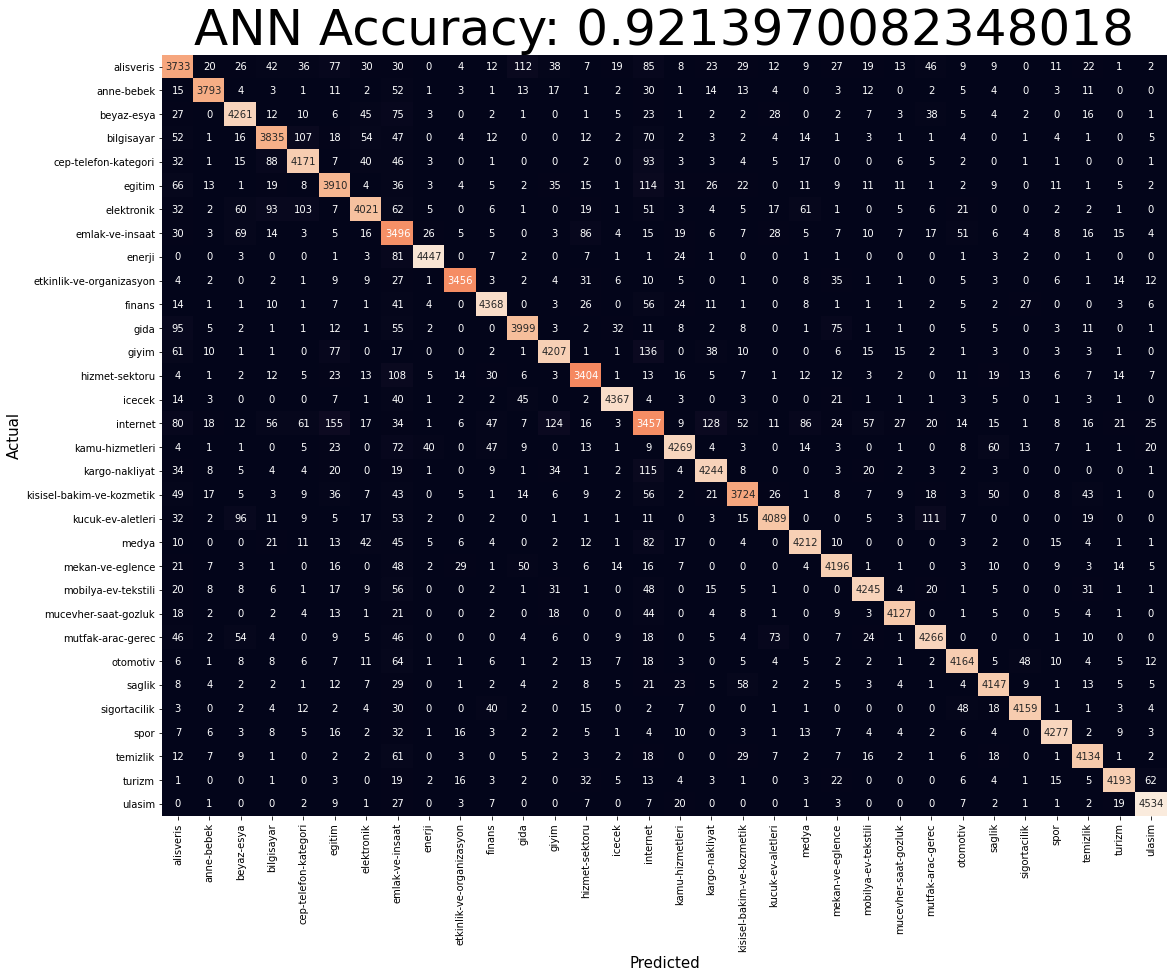

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

ann_accuracy = accuracy_score(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
#print("ANN Accuracy:",ann_accuracy)
ann_cn = confusion_matrix(y_test.argmax(axis=-1),ypred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(ann_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("ANN Accuracy: {}".format(ann_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

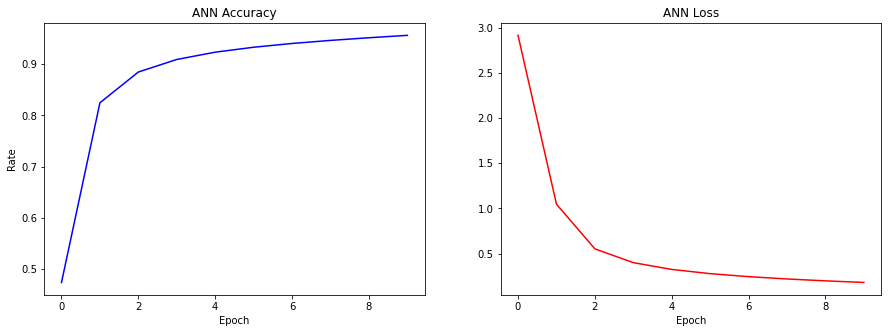

In [30]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(ann_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(ann_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("ANN Accuracy")
axe1[1].title.set_text("ANN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

# **CNN Building and Fitting** <a id="5"></a>

Before starting, I'm very grateful to Raj Mehrotra for sharing ["A Detailed Explanation of Keras Embedding Layer"](https://www.kaggle.com/rajmehra03/a-detailed-explanation-of-keras-embedding-layer)

In [31]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

#preparing x for CNN
MAX_FEATURES = 20001

onehot_corpus = []
for text in textList:
    onehot_corpus.append(one_hot(text,MAX_FEATURES))
    
maxTextLen = 0
for text in textList:
    word_token=word_tokenize(text)
    if(maxTextLen < len(word_token)):
        maxTextLen = len(word_token)
        
print("Max number of words : ",maxTextLen)

padded_corpus=pad_sequences(onehot_corpus,maxlen=maxTextLen,padding='post')
x_train2,x_test2,y_train2,y_test2 = train_test_split(padded_corpus,categorical_y,test_size=0.33,random_state=42)

Max number of words :  164


In [32]:
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten
def build_cnn_model():
    model = Sequential()
    
    model.add(Embedding(MAX_FEATURES, 100, input_length=maxTextLen))


    model.add(Conv1D(64, 2, padding='same', activation='relu'))
    model.add(MaxPooling1D(2))
    #model.add(MaxPooling1D(2))
    
    model.add(Flatten())
    
    model.add(Dense(units=1024,activation="relu"))
    model.add(Dense(units=512,activation="relu"))
    
    model.add(Dense(units=y_train2.shape[1],activation="softmax"))
    
    optimizer = Adam(lr=0.000055,beta_1=0.9,beta_2=0.999)
    
    model.compile(optimizer=optimizer,metrics=["accuracy"],loss=categorical_crossentropy)
    return model

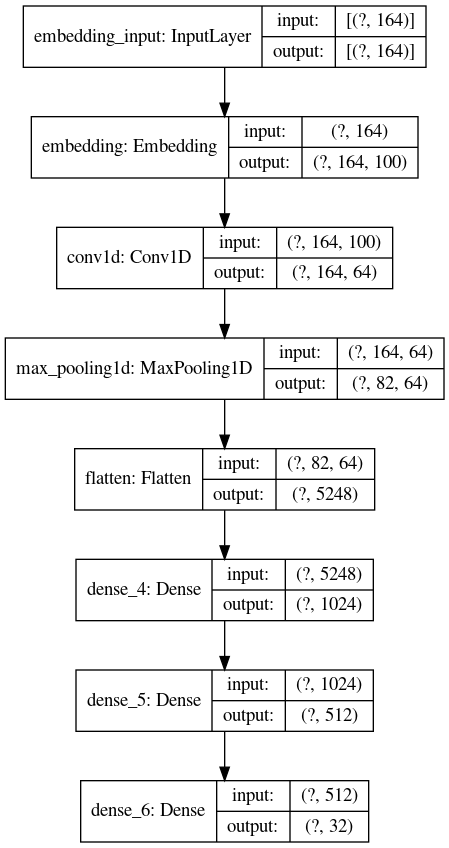

In [33]:
cnn_model = build_cnn_model()
plot_model(cnn_model,show_shapes=True)

In [34]:
cnn_history = cnn_model.fit(x_train2,y_train2,epochs=10,batch_size=1280,shuffle=True)
ypred2 = cnn_model.predict(x_test2)

Epoch 1/10
224/224 [==============================] - 175s 779ms/step - loss: 3.3644 - accuracy: 0.1385
Epoch 2/10
224/224 [==============================] - 175s 779ms/step - loss: 2.0285 - accuracy: 0.5362
Epoch 3/10
224/224 [==============================] - 178s 796ms/step - loss: 0.9906 - accuracy: 0.7762
Epoch 4/10
224/224 [==============================] - 173s 774ms/step - loss: 0.6130 - accuracy: 0.8613
Epoch 5/10
224/224 [==============================] - 173s 774ms/step - loss: 0.4467 - accuracy: 0.8977
Epoch 6/10
224/224 [==============================] - 175s 781ms/step - loss: 0.3568 - accuracy: 0.9172
Epoch 7/10
224/224 [==============================] - 181s 808ms/step - loss: 0.2997 - accuracy: 0.9298
Epoch 8/10
224/224 [==============================] - 174s 777ms/step - loss: 0.2595 - accuracy: 0.9390
Epoch 9/10
224/224 [==============================] - 174s 779ms/step - loss: 0.2287 - accuracy: 0.9465
Epoch 10/10
224/224 [==============================] - 179s 798m

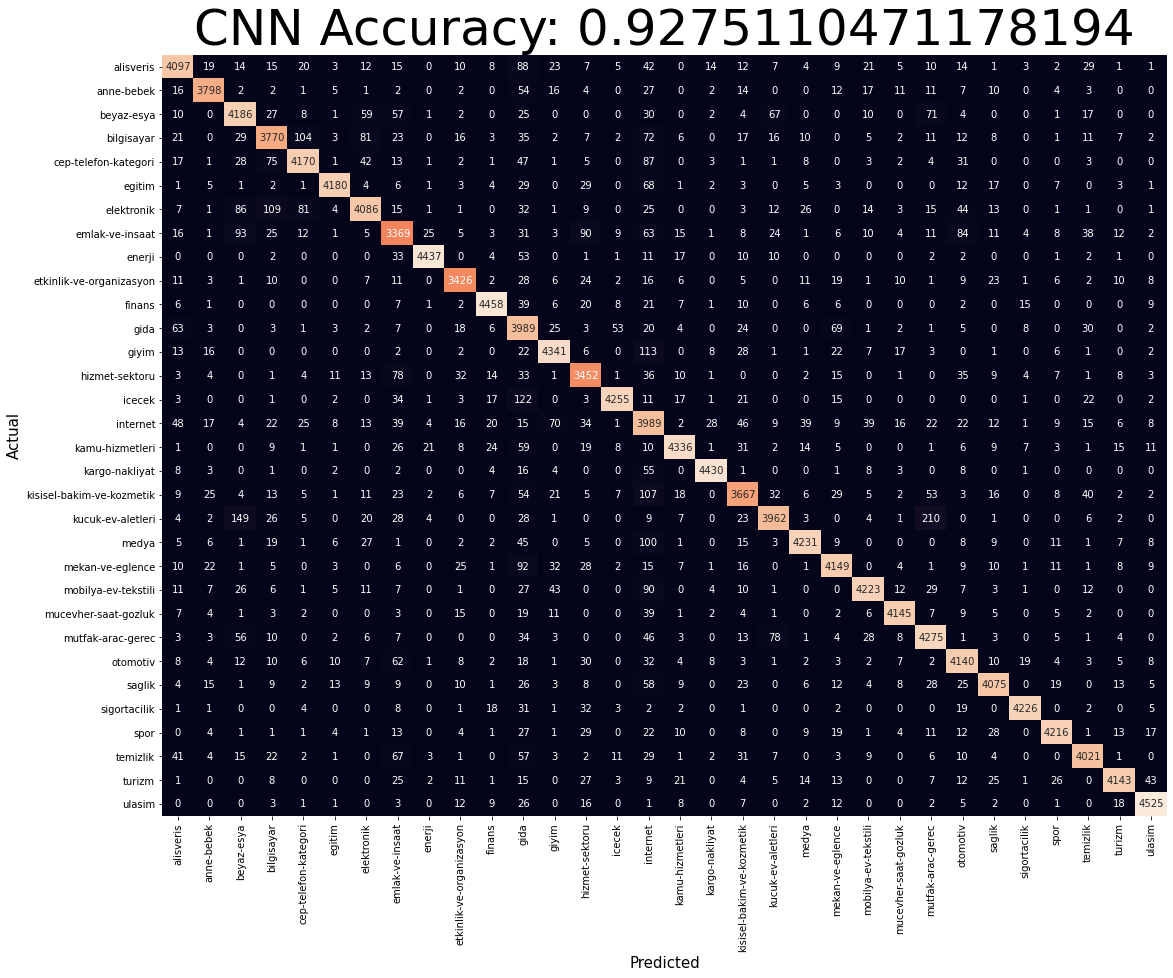

In [35]:
cnn_accuracy = accuracy_score(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
#print("CNN Accuracy:",cnn_accuracy)
cnn_cn = confusion_matrix(y_test2.argmax(axis=-1),ypred2.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_cn,annot=True,fmt="1d",cbar=False,xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("CNN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.show()

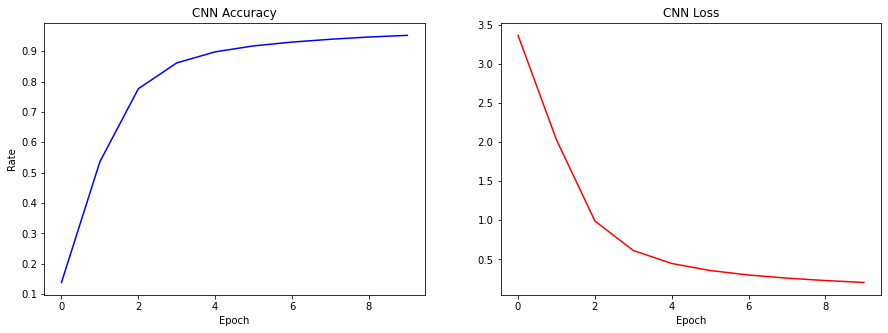

In [36]:
fig3, axe1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axe1[0].plot(cnn_history.history["accuracy"],label="accuracy",color="blue")
axe1[1].plot(cnn_history.history["loss"],label="loss",color="red")
axe1[0].title.set_text("CNN Accuracy")
axe1[1].title.set_text("CNN Loss")
axe1[0].set_xlabel("Epoch")
axe1[1].set_xlabel("Epoch")
axe1[0].set_ylabel("Rate")
plt.show()

In [37]:
def ann_predict(text):
    puretext = leadMyWord(text)
    vector = tfidv.transform([puretext])
    vector.sort_indices()
    predicted = ann_model.predict(vector)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
def cnn_predict(text):
    puretext = leadMyWord(text)
    onehottext = one_hot(puretext,MAX_FEATURES)
    text_pad = pad_sequences([onehottext],maxlen=maxTextLen,padding='post')
    predicted = cnn_model.predict(text_pad)
    predicted_category = predicted.argmax(axis=1)
    return le.classes_[predicted_category]
    
for _ in range(10):
    randint = np.random.randint(len(data))
    text = data.text[randint]  
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("Actual Category: {}".format(data.category[randint]))
    print("ANN Predicted Category: {}".format(ann_predict(text)[0]))
    print("CNN Predicted Category: {}".format(cnn_predict(text)[0]))
    print("*"*50)
    

  Text
--------
Sürat Kargo Ürün Teslimatı Yapılmadı!,"Yapamadığınız işi bırakın insanları daha fazla mağdur etmeyin . Sizinle çalışan firmaları hala anlamış değilim bu kadar sorumsuz ve sorunlu bir firma olmaması gerekir 12 gündür kargo bekliyorum.
--------------------
Actual Category: kargo-nakliyat
ANN Predicted Category: kargo-nakliyat
CNN Predicted Category: kargo-nakliyat
**************************************************
  Text
--------
Balsan Unlu Mamüller Çiftli Ekmek,Akşam akşam 1 tane ekmek istiyorum bana abi 1 tane ekmek yok ekmek çiftli diye cevap veriyor tekli ekmek yok mu diyorum poşetleyip önüme koyuyor 125₺ veriyorum abi ekmek çiftli 25₺ diyor ben mi anlatamıyorum çalışanlarm ı anlamıyor çift ekmek nedir diyorsunuz Covid 19 peki siz salgını mı bahane ed
--------------------
Actual Category: gida
ANN Predicted Category: gida
CNN Predicted Category: gida
**************************************************
  Text
--------
Cinemaximum'da Mısır Fiyatları Yüksek,Mısır fiyatla

In [38]:
#Let me try it too
def predict_print(text):
    print("  Text")
    print("-"*8)
    print(text)
    print("-"*20)
    print("ANN Predicted Category: {}".format(ann_predict(text)[0]))
    print("CNN Predicted Category: {}".format(cnn_predict(text)[0]))
    print("*"*50)
myText = "Yemeğin içinden kıl çıktı, gitmenizi önermiyorum." # hair came out of the dish, I don't suggest you go
predict_print(myText)
myText = "Tuş bozuk." # Key Broken
predict_print(myText)

  Text
--------
Yemeğin içinden kıl çıktı, gitmenizi önermiyorum.
--------------------
ANN Predicted Category: mekan-ve-eglence
CNN Predicted Category: gida
**************************************************
  Text
--------
Tuş bozuk.
--------------------
ANN Predicted Category: elektronik
CNN Predicted Category: enerji
**************************************************


<h1 >Thanks for reading, I'm open to your advices.</h1>